In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
acc_data = pd.read_csv('crash_info.csv')
acc_data.head()

,event_id,segment_id,event_subtype,start_tstamp,closed_tstamp,precipitation_flag,precip_rate,speed_at_crash,reference_speed,arrived,...,vehicle_count,Car_count,SUV_count,Tractor_count,Bus_count,Car&Trailor_count,van_count,overturned,Jack Knifed,Lost_Load
0,event_0,segment_599,accident,2019-01-01 00:17:09-05:00,2019-01-01 00:51:23-05:00,Rain,0.62,56.0,56.0,2019-01-01 00:17:13-05:00,...,0,0,0,0,0,0,0,0,0,0
1,event_1,segment_853,accident,2019-01-01 00:44:59-05:00,2019-01-01 01:13:24-05:00,No Percipitation,0.00,55.0,56.0,2019-01-01 00:45:07-05:00,...,0,0,0,0,0,0,0,0,0,0
2,event_2,segment_600,accident,2019-01-01 01:01:37-05:00,2019-01-01 01:16:49-05:00,No Percipitation,0.00,57.0,64.0,2019-01-01 01:01:41-05:00,...,0,0,0,0,0,0,0,0,0,0
3,event_3,segment_1209,injury accident,2019-01-01 01:30:04-05:00,2019-01-01 02:35:53-05:00,No Percipitation,0.00,50.0,38.0,2019-01-01 01:32:07-05:00,...,1,1,0,0,0,0,0,0,0,0
4,event_4,segment_2088,accident,2019-01-01 02:20:22-05:00,2019-01-01 02:44:17-05:00,No Percipitation,0.00,43.0,43.0,2019-01-01 02:22:06-05:00,...,1,1,0,0,0,0,0,0,0,0


In [3]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [4]:
from dateutil import parser
ds = '2019-01-01 00:17:09-05:00' 
date = parser.parse(ds)
print(date)

2019-01-01 00:17:09-05:00


In [5]:
#Replace the existing timestamp columns with new datetime values:

acc_data['start_tstamp'] = acc_data['start_tstamp'].map(lambda t: parser.parse(t))
acc_data['closed_tstamp'] = acc_data['closed_tstamp'].map(lambda t: parser.parse(t))




In [6]:
#Check if the columns have been updated with datetime values:
type(acc_data['closed_tstamp'][0])

datetime.datetime

In [7]:
acc_data['Crash_duration'] = acc_data['closed_tstamp'] - acc_data['start_tstamp']



In [8]:
acc_data.head()

,event_id,segment_id,event_subtype,start_tstamp,closed_tstamp,precipitation_flag,precip_rate,speed_at_crash,reference_speed,arrived,...,Car_count,SUV_count,Tractor_count,Bus_count,Car&Trailor_count,van_count,overturned,Jack Knifed,Lost_Load,Crash_duration
0,event_0,segment_599,accident,2019-01-01 00:17:09-05:00,2019-01-01 00:51:23-05:00,Rain,0.62,56.0,56.0,2019-01-01 00:17:13-05:00,...,0,0,0,0,0,0,0,0,0,0 days 00:34:14
1,event_1,segment_853,accident,2019-01-01 00:44:59-05:00,2019-01-01 01:13:24-05:00,No Percipitation,0.00,55.0,56.0,2019-01-01 00:45:07-05:00,...,0,0,0,0,0,0,0,0,0,0 days 00:28:25
2,event_2,segment_600,accident,2019-01-01 01:01:37-05:00,2019-01-01 01:16:49-05:00,No Percipitation,0.00,57.0,64.0,2019-01-01 01:01:41-05:00,...,0,0,0,0,0,0,0,0,0,0 days 00:15:12
3,event_3,segment_1209,injury accident,2019-01-01 01:30:04-05:00,2019-01-01 02:35:53-05:00,No Percipitation,0.00,50.0,38.0,2019-01-01 01:32:07-05:00,...,1,0,0,0,0,0,0,0,0,0 days 01:05:49
4,event_4,segment_2088,accident,2019-01-01 02:20:22-05:00,2019-01-01 02:44:17-05:00,No Percipitation,0.00,43.0,43.0,2019-01-01 02:22:06-05:00,...,1,0,0,0,0,0,0,0,0,0 days 00:23:55


<AxesSubplot:>

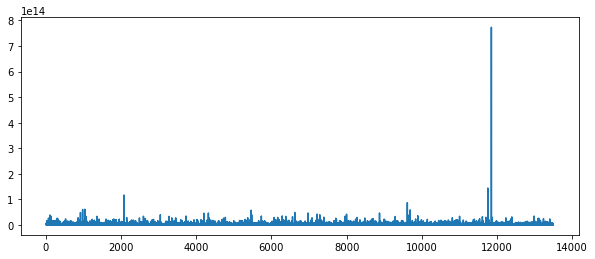

In [9]:
acc_data['Crash_duration'].plot(figsize=(10,4))   


### question 2

In [10]:
#convert each row in dataframe from datetime to month format:
crashes_month = acc_data.groupby(acc_data['start_tstamp'].map(lambda t: t.strftime("%m")))


In [11]:
#let's check the keys of the group object
crashes_month.groups.keys()

dict_keys(['01', '02', '03', '04', '05', '07', '08', '09', '10', '11', '12'])

key-'06' is missing, which means no data was recorded for the month of June.

In [15]:
crashes_month_df = crashes_month.count()

In [16]:
#renaming the index to month names:
crashes_month_df.index = ['January', 'February', 'March', 'April', 'May', 'July',
       'August', 'September', 'October', 'November','December']


In [17]:
crashes_month_df.head(120)

,event_id,segment_id,event_subtype,start_tstamp,closed_tstamp,precipitation_flag,precip_rate,speed_at_crash,reference_speed,arrived,...,Car_count,SUV_count,Tractor_count,Bus_count,Car&Trailor_count,van_count,overturned,Jack Knifed,Lost_Load,Crash_duration
January,1507,1507,1507,1507,1507,1507,1507,1497,1497,1467,...,1507,1507,1507,1507,1507,1507,1507,1507,1507,1507
February,1443,1443,1443,1443,1443,1443,1440,1433,1433,1406,...,1443,1443,1443,1443,1443,1443,1443,1443,1443,1443
March,1386,1386,1386,1386,1386,1386,1385,1381,1381,1356,...,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386
April,1384,1384,1384,1384,1384,1384,1383,1306,1306,1347,...,1384,1384,1384,1384,1384,1384,1384,1384,1384,1384
May,411,411,411,411,411,411,411,409,409,401,...,411,411,411,411,411,411,411,411,411,411
July,429,429,429,429,429,429,428,428,428,413,...,429,429,429,429,429,429,429,429,429,429
August,1252,1252,1252,1252,1252,1252,1251,1237,1237,1209,...,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252
September,1284,1284,1284,1284,1284,1284,1284,1252,1252,1254,...,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284
October,1493,1493,1493,1493,1493,1493,1493,1479,1479,1432,...,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493
November,1357,1357,1357,1357,1357,1357,1357,1347,1347,1286,...,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357


In [18]:
crashes_month_df = crashes_month_df['event_id']

In [19]:
crashes_month_df

January      1507
February     1443
March        1386
April        1384
May           411
July          429
August       1252
September    1284
October      1493
November     1357
December     1550
Name: event_id, dtype: int64

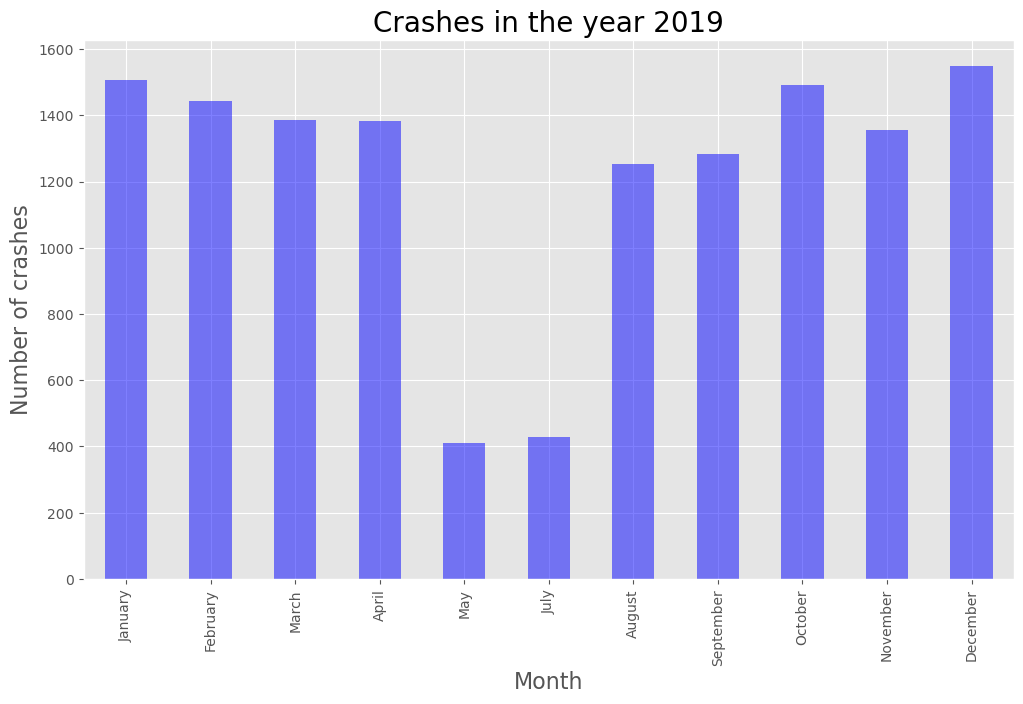

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
crashes_month_df.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Crashes in the year 2019', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of crashes',fontsize=16);

In [256]:
#similar to previous one, convert the format of every datetime row into corresponding hour of the day:
crashes_hour = acc_data.groupby(acc_data['start_tstamp'].map(lambda t: t.strftime("%H")))


In [257]:
crashes_hour.groups.keys()

dict_keys(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

In [266]:
crashes_hour_df = crashes_hour['event_id'].count()


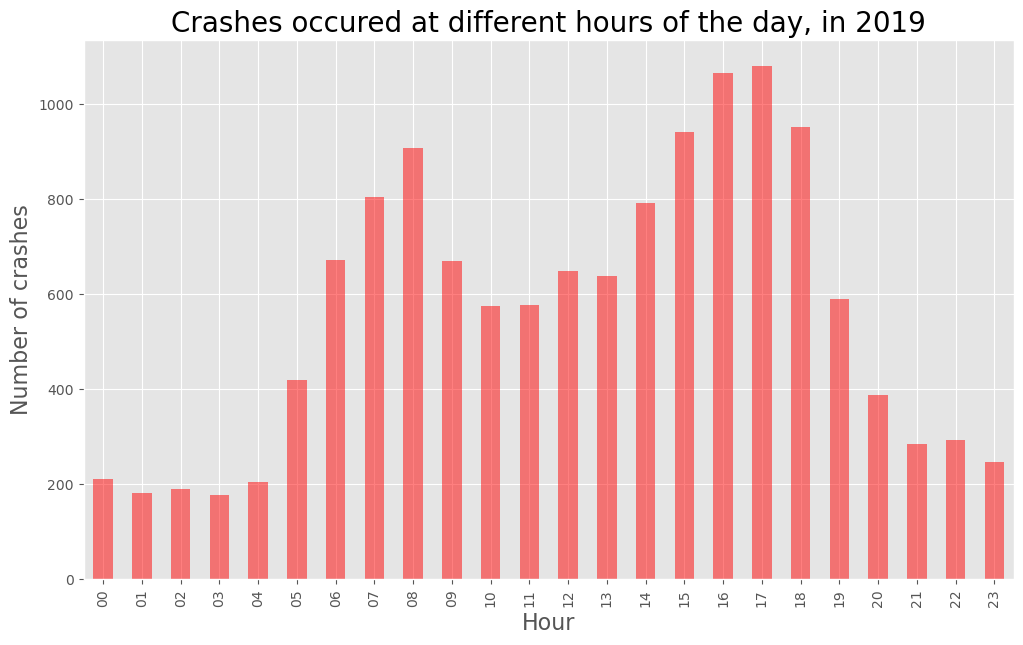

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
crashes_hour_df.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.title('Crashes occured at different hours of the day, in 2019', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of crashes',fontsize=16);

In [148]:
crashes_week = acc_data.groupby(acc_data['start_tstamp'].map(lambda t: t.weekday()))


In [149]:
crashes_week.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [157]:
crashes_week_df = crashes_week['event_id'].count()


In [158]:
crashes_week_df.index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

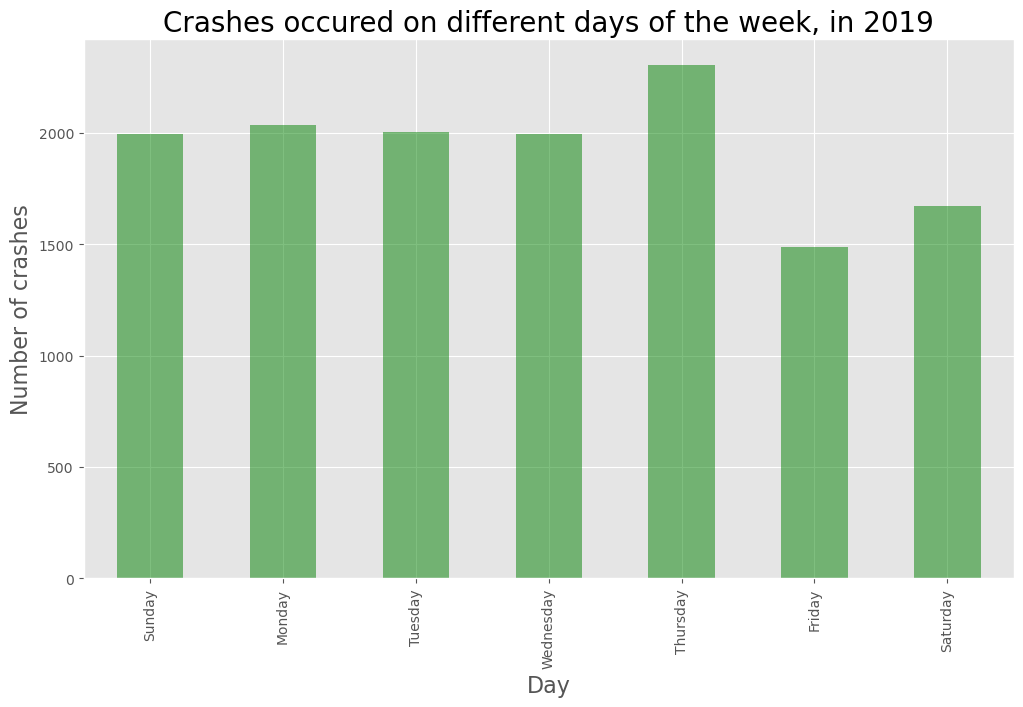

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
crashes_week_df.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Crashes occured on different days of the week, in 2019', fontsize=20)
plt.xlabel('Day',fontsize=16)
plt.ylabel('Number of crashes',fontsize=16);

### question 3

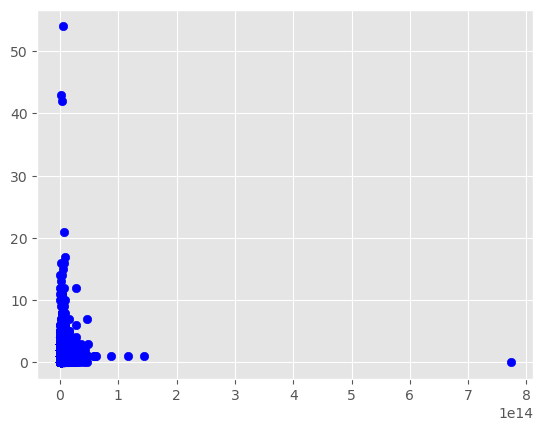

In [168]:
x = acc_data['Crash_duration']
y = acc_data['vehicle_count']

plt.scatter(x, y, c ="blue")


### question 4.

In [202]:
segment_data = pd.read_csv('segment_info.csv')


In [222]:
crash_segment = acc_data.groupby(acc_data['segment_id'])


In [230]:
#In this dataframe, event_id column stores the no. of events under a given segment_id
crash_segment_df = pd.DataFrame(crash_segment['event_id'].count())
crash_segment_df


,event_id
segment_id,
segment_0,1
segment_1,3
segment_10,8
segment_100,2
segment_1000,2
...,...
segment_995,2
segment_996,3
segment_997,7


In [231]:
crash_segment_df.reset_index(inplace=True)


In [245]:
#Perform inner join on 2 dataframes:
merged_data = crash_segment_df[['event_id','segment_id']].merge(segment_data[['func_class','segment_id']], 
                                     on = "segment_id", 
                                     how = "inner")
merged_data.head()


,event_id,segment_id,func_class
0,1,segment_0,3
1,3,segment_1,3
2,8,segment_10,1
3,2,segment_100,2
4,2,segment_1000,3


In [251]:
#We find the corresponding count of events for every given func_class:
result = merged_data.groupby(merged_data['func_class'])['event_id'].sum()
print(result)

func_class
1    8290
2    3540
3     952
4     703
5      11
Name: event_id, dtype: int64


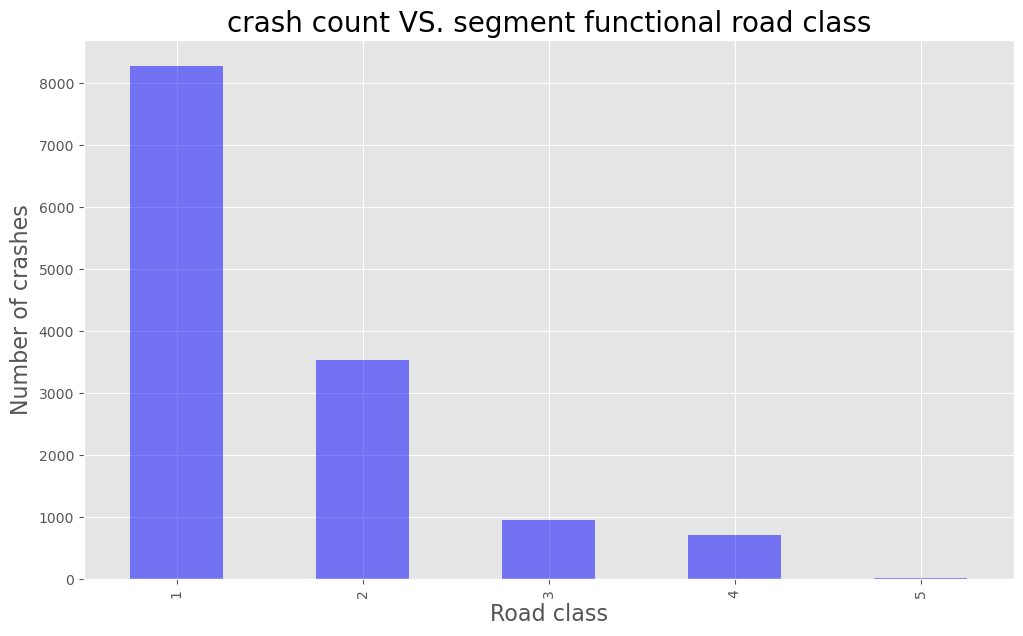

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# plot accidents per month
result.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('crash count VS. segment functional road class', fontsize=20)
plt.xlabel('Road class',fontsize=16)
plt.ylabel('Number of crashes',fontsize=16);

### question 5

In [253]:
segment_data['VMT'] = segment_data['miles']*segment_data['aadt']
segment_data.head()

,segment_id,road,direction,miles,road_class,func_class,aadt,VMT
0,segment_0,road_11000065,WESTBOUND,0.537277,Interstate,3,39821,21394.907576
1,segment_1,road_11000065,EASTBOUND,0.873947,Interstate,3,46061,40254.872905
2,segment_2,road_11000065,EASTBOUND,0.831921,Interstate,3,10938,9099.551931
3,segment_3,road_11000065,WESTBOUND,0.654299,Interstate,3,41522,27167.803161
4,segment_4,road_11000065,WESTBOUND,0.817158,Interstate,3,32572,26616.470506


In [273]:
crash_count = acc_data.groupby(acc_data['segment_id'])['event_id'].count()
crash_count = pd.DataFrame(crash_count)
crash_count.reset_index(inplace=True)
crash_count.head()

,segment_id,event_id
0,segment_0,1
1,segment_1,3
2,segment_10,8
3,segment_100,2
4,segment_1000,2


In [274]:
VMT_crash = segment_data[['VMT','segment_id']].merge(crash_count[['event_id','segment_id']], 
                                     on = "segment_id", 
                                     how = "inner")
VMT_crash.head()


,VMT,segment_id,event_id
0,21394.907576,segment_0,1
1,40254.872905,segment_1,3
2,9099.551931,segment_2,1
3,27167.803161,segment_3,4
4,26616.470506,segment_4,2


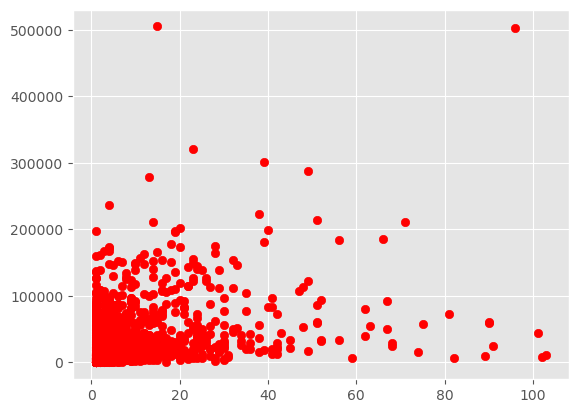

In [277]:
y = VMT_crash['VMT']
x = VMT_crash['event_id']

plt.scatter(x, y, c ="red")

### question 6.

### Regression:

Importing data once again:

In [4]:
#reading data again but replacing missing values with NaN this time:
df1 = pd.read_csv('crash_info.csv', na_values=' ')
df1.head()

,event_id,segment_id,event_subtype,start_tstamp,closed_tstamp,precipitation_flag,precip_rate,speed_at_crash,reference_speed,arrived,...,vehicle_count,Car_count,SUV_count,Tractor_count,Bus_count,Car&Trailor_count,van_count,overturned,Jack Knifed,Lost_Load
0,event_0,segment_599,accident,2019-01-01 00:17:09-05:00,2019-01-01 00:51:23-05:00,Rain,0.62,56.0,56.0,2019-01-01 00:17:13-05:00,...,0,0,0,0,0,0,0,0,0,0
1,event_1,segment_853,accident,2019-01-01 00:44:59-05:00,2019-01-01 01:13:24-05:00,No Percipitation,0.00,55.0,56.0,2019-01-01 00:45:07-05:00,...,0,0,0,0,0,0,0,0,0,0
2,event_2,segment_600,accident,2019-01-01 01:01:37-05:00,2019-01-01 01:16:49-05:00,No Percipitation,0.00,57.0,64.0,2019-01-01 01:01:41-05:00,...,0,0,0,0,0,0,0,0,0,0
3,event_3,segment_1209,injury accident,2019-01-01 01:30:04-05:00,2019-01-01 02:35:53-05:00,No Percipitation,0.00,50.0,38.0,2019-01-01 01:32:07-05:00,...,1,1,0,0,0,0,0,0,0,0
4,event_4,segment_2088,accident,2019-01-01 02:20:22-05:00,2019-01-01 02:44:17-05:00,No Percipitation,0.00,43.0,43.0,2019-01-01 02:22:06-05:00,...,1,1,0,0,0,0,0,0,0,0


In [5]:
df2 = pd.read_csv('segment_info.csv', na_values=' ')
df2.head()

,segment_id,road,direction,miles,road_class,func_class,aadt
0,segment_0,road_11000065,WESTBOUND,0.537277,Interstate,3,39821
1,segment_1,road_11000065,EASTBOUND,0.873947,Interstate,3,46061
2,segment_2,road_11000065,EASTBOUND,0.831921,Interstate,3,10938
3,segment_3,road_11000065,WESTBOUND,0.654299,Interstate,3,41522
4,segment_4,road_11000065,WESTBOUND,0.817158,Interstate,3,32572


In [6]:
df3 = pd.read_csv('speed.csv', na_values=' ')
df3.head()

,segment_id,measurement_tstamp,speed
0,segment_879,2019-01-01 00:00:00-05:00,57.2
1,segment_879,2019-01-01 00:05:00-05:00,56.4
2,segment_879,2019-01-01 00:10:00-05:00,56.6
3,segment_879,2019-01-01 00:15:00-05:00,57.0
4,segment_879,2019-01-01 00:20:00-05:00,57.0


In [7]:
df = df1.merge(df2,on='segment_id')
df.head()


,event_id,segment_id,event_subtype,start_tstamp,closed_tstamp,precipitation_flag,precip_rate,speed_at_crash,reference_speed,arrived,...,van_count,overturned,Jack Knifed,Lost_Load,road,direction,miles,road_class,func_class,aadt
0,event_0,segment_599,accident,2019-01-01 00:17:09-05:00,2019-01-01 00:51:23-05:00,Rain,0.62,56.0,56.0,2019-01-01 00:17:13-05:00,...,0,0,0,0,road_11000102,NORTHBOUND,0.043588,Interstate,3,91555
1,event_474,segment_599,accident,2019-01-11 17:16:20-05:00,2019-01-11 17:17:05-05:00,No Percipitation,0.00,22.0,56.0,2019-01-11 17:17:00-05:00,...,0,0,0,0,road_11000102,NORTHBOUND,0.043588,Interstate,3,91555
2,event_1367,segment_599,accident,2019-01-28 16:18:55-05:00,2019-01-28 16:36:58-05:00,No Percipitation,0.00,56.0,56.0,2019-01-28 16:36:51-05:00,...,0,0,0,0,road_11000102,NORTHBOUND,0.043588,Interstate,3,91555
3,event_2001,segment_599,injury accident,2019-02-11 04:54:51-05:00,2019-02-11 05:10:34-05:00,Snow,3.62,53.0,56.0,2019-02-11 04:55:05-05:00,...,0,0,0,0,road_11000102,NORTHBOUND,0.043588,Interstate,3,91555
4,event_2057,segment_599,injury accident,2019-02-11 12:21:00-05:00,2019-02-11 12:55:39-05:00,Snow,1.05,52.0,56.0,2019-02-11 12:21:15-05:00,...,0,0,0,0,road_11000102,NORTHBOUND,0.043588,Interstate,3,91555


In [8]:
#Since we're having a memory issue here, let's just consider first 2 dataframes for now:

### Data preparation:


In [9]:
#checking any duplicates:
a = df.duplicated()
True in a

True

In [10]:
# Only drop rows with all missing values
df.dropna(how='all',inplace=True)


In [11]:
#check if Nan values have been entered:
df.isnull().sum()

event_id                 0
segment_id               0
event_subtype            0
start_tstamp             0
closed_tstamp            0
precipitation_flag       0
precip_rate              9
speed_at_crash         188
reference_speed        188
arrived                444
notified              4907
total_lanes            588
open_lanes             588
closed_lanes           588
unknown_lanes          588
road_condition           0
vehicle_count            0
Car_count                0
SUV_count                0
Tractor_count            0
Bus_count                0
Car&Trailor_count        0
van_count                0
overturned               0
Jack Knifed              0
Lost_Load                0
road                     0
direction                0
miles                    0
road_class               0
func_class               0
aadt                     0
dtype: int64

#### Data-specific cleaning:

1.Since speed_at_crash is quite likely to be one of the determining factors for our dependent variable crash_duration,
and 188 is not a reasonable number compared to the overall dataset size, let's simply drop the rows. As 
unnecessary imputation can cause a lower accuracy.

2.Same goes with the reference speed.

3.One can't assume the arrival times of an emergency fleet. However, it's highly unlikely that it would play any role in 
determining crash duration. So better to impute than lose data.

4.Since the notified time is very unlikely to determine the crash_duration, it's better to impute values rather than
losing important information in other columns by dropping those rows, as the number of NaNs here is significant.

5.Finally, the NaNs in total_lanes, open_lanes, closed_lanes and unknown_lanes may play a role in determining the 
overall accuracy of the crash duration prediction. Therefore imputing is better than dropping a considerable amount
of important data.

6.Also we can drop the 6 missing values of precip_rate


In [12]:
#1.
df = df[df['speed_at_crash'].notna()]

In [15]:
#2.
df = df[df['reference_speed'].notna()]

In [16]:
#3.
#use forward fill for this:
df['arrived'].ser5.fillna(ser5.mean())fillna(method='ffill',inplace=True)

In [17]:
#4.
df['notified'].fillna(method='ffill',inplace=True)

In [19]:
#5.Using mean values for lanes:
df['total_lanes'].fillna(df['total_lanes'].mean(),inplace=True)
df['open_lanes'].fillna(df['open_lanes'].mean(),inplace=True)
df['closed_lanes'].fillna(df['closed_lanes'].mean(),inplace=True)
df['unknown_lanes'].fillna(df['unknown_lanes'].mean(),inplace=True)



In [20]:
#6. 
df = df[df['precip_rate'].notna()]

In [21]:
df.isnull().sum()

event_id              0
segment_id            0
event_subtype         0
start_tstamp          0
closed_tstamp         0
precipitation_flag    0
precip_rate           0
speed_at_crash        0
reference_speed       0
arrived               0
notified              0
total_lanes           0
open_lanes            0
closed_lanes          0
unknown_lanes         0
road_condition        0
vehicle_count         0
Car_count             0
SUV_count             0
Tractor_count         0
Bus_count             0
Car&Trailor_count     0
van_count             0
overturned            0
Jack Knifed           0
Lost_Load             0
road                  0
direction             0
miles                 0
road_class            0
func_class            0
aadt                  0
dtype: int64

In [27]:
df['Crash_duration'] = pd.to_datetime(df['closed_tstamp']) - pd.to_datetime(df['start_tstamp'])


In [29]:
df = df.set_index('event_id')


In [105]:
print(df.describe())

        precip_rate  speed_at_crash  reference_speed   total_lanes  \
count  13299.000000    13299.000000     13299.000000  13299.000000   
mean       0.243778       46.928265        57.234379     12.441763   
std        1.659268       18.488894         9.265630      3.728103   
min        0.000000        2.000000         8.000000      2.000000   
25%        0.000000       32.000000        56.000000     11.000000   
50%        0.000000       53.000000        60.000000     13.000000   
75%        0.000000       62.000000        63.000000     14.000000   
max       58.000000       82.000000        71.000000     32.000000   

         open_lanes  closed_lanes  unknown_lanes  vehicle_count     Car_count  \
count  13299.000000  13299.000000   13299.000000   13299.000000  13299.000000   
mean       8.695691      0.839311       2.819986       1.671253      1.392586   
std        4.050288      1.261721       3.203846       1.373610      1.327807   
min        0.000000      0.000000       0.000

In [106]:
print(df.dtypes)


event_id              object
segment_id            object
event_subtype         object
start_tstamp          object
closed_tstamp         object
precipitation_flag    object
precip_rate            int32
speed_at_crash         int32
reference_speed        int32
arrived               object
notified              object
total_lanes            int32
open_lanes             int32
closed_lanes           int32
unknown_lanes          int32
road_condition        object
vehicle_count          int64
Car_count              int64
SUV_count              int64
Tractor_count          int64
Bus_count              int64
Car&Trailor_count      int64
van_count              int64
overturned             int32
Jack Knifed            int64
Lost_Load              int64
road                  object
direction             object
miles                  int32
road_class            object
func_class             int64
aadt                   int64
Crash_duration         int32
dtype: object


In [116]:
#Before we build a model, it's important to convert crash_duration into a numerical value,to be used for Regression model
df['Crash_duration'] = df['Crash_duration'].map(lambda t: t.total_seconds())
df['Crash_duration'] = df['Crash_duration'].astype(int)


For regression, let's first pick the top 15 columns having high correlation to the crash_duration variable

In [109]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(15, 'Crash_duration')
columns

,precip_rate,speed_at_crash,reference_speed,total_lanes,open_lanes,closed_lanes,unknown_lanes,vehicle_count,Car_count,SUV_count,...,Bus_count,Car&Trailor_count,van_count,overturned,Jack Knifed,Lost_Load,miles,func_class,aadt,Crash_duration
Crash_duration,-0.001022,0.027319,-0.047507,-0.093136,-0.108270,0.101461,-0.007167,0.007223,-0.025883,0.067069,...,0.017281,0.041373,0.011124,0.114130,0.030868,0.044298,0.071124,0.092085,-0.098428,1.000000
overturned,-0.000313,0.059022,0.009931,-0.035800,-0.066020,0.076132,0.016827,-0.011671,-0.036532,0.088568,...,-0.019350,-0.014586,-0.006044,1.000000,-0.003336,0.007332,0.040206,0.035612,-0.050359,0.114130
closed_lanes,-0.005174,-0.094952,-0.114286,-0.052196,0.116996,1.000000,-0.584439,0.098775,0.069886,0.040159,...,0.037131,0.122126,0.055436,0.076132,0.006973,0.019881,0.031353,0.124642,-0.047216,0.101461
func_class,-0.018461,-0.184216,-0.594277,-0.462809,-0.427737,0.124642,-0.043187,-0.015633,-0.027999,0.037849,...,0.034618,0.099918,0.060203,0.035612,-0.017584,0.007827,0.027009,1.000000,-0.549049,0.092085
miles,0.025812,0.165174,0.156970,-0.209042,-0.163397,0.031353,-0.046263,-0.010904,-0.025686,0.032267,...,-0.002240,0.003637,0.001551,0.040206,0.006405,0.014521,1.000000,0.027009,-0.150985,0.071124
SUV_count,-0.004991,-0.051004,-0.026669,-0.051410,-0.046278,0.040159,-0.011548,0.233005,-0.112847,1.000000,...,-0.022266,-0.011366,-0.007068,0.088568,0.288652,0.088667,0.032267,0.037849,-0.026804,0.067069
Lost_Load,-0.006135,0.004679,0.003270,-0.018837,-0.022431,0.019881,-0.001303,-0.005814,-0.034990,0.088667,...,-0.004017,-0.003028,-0.001255,0.007332,-0.001733,1.000000,0.014521,0.007827,-0.021193,0.044298
Car&Trailor_count,-0.005916,-0.028171,-0.111233,-0.041878,-0.071356,0.122126,-0.005198,0.026264,-0.031316,-0.011366,...,-0.006978,1.000000,-0.002180,-0.014586,-0.003010,-0.003028,0.003637,0.099918,-0.049581,0.041373
Jack Knifed,0.012503,0.012854,0.009920,0.000363,0.000228,0.006973,-0.001488,0.063785,-0.035918,0.288652,...,-0.003993,-0.003010,-0.001247,-0.003336,1.000000,-0.001733,0.006405,-0.017584,0.007827,0.030868
speed_at_crash,0.012959,1.000000,0.433958,0.034618,0.018426,-0.094952,0.054026,-0.131767,-0.116361,-0.051004,...,-0.008890,-0.028171,-0.031038,0.059022,0.012854,0.004679,0.165174,-0.184216,-0.021791,0.027319


#### Algorithm:

In [110]:
X = df[columns]
Y = X['Crash_duration'].values
X = X.drop('Crash_duration', axis = 1).values

In [111]:
from sklearn.model_selection import train_test_split


In [112]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=56)

In [113]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### question 7.

In [ ]:
### My approach for the last question:

In [ ]:

import matplotlib.pyplot as plt



# Loop through the segments data set and identify the segments with more than 75 crashes per year
high_crash_segments = segment_data[segment_data["annual_crashes"] > 75]

for index, segment in high_crash_segments.iterrows():
    # Calculate the speed ratio distribution for crash time intervals
    crash_time_intervals = []
    crash_speeds = []
    
    # Loop through the crashes data set and find the crashes that occurred on the current segment
    segment_crashes = crashes_df[crashes_df["segment_id"] == segment["segment_id"]]
    for _, crash in segment_crashes.iterrows():
        # Determine the start and end times for the current crash
        start_time = pd.to_datetime(crash["start_time"])
        end_time = pd.to_datetime(crash["end_time"])
        
        # Loop through the speed data set and find all the 5-minute time intervals that fall within the crash time interval
        segment_speeds = speeds_df[(speeds_df["segment_id"] == segment["segment_id"]) & (speeds_df["timestamp"] >= start_time) & (speeds_df["timestamp"] < end_time)]
        segment_speeds["time_interval"] = segment_speeds["timestamp"].dt.floor("5min")
        time_intervals = segment_speeds.groupby("time_interval").mean()
        
        # Calculate the speed ratio for each time interval and store it in a list
        for _, interval in time_intervals.iterrows():
            crash_time_intervals.append(interval["timestamp"])
            crash_speeds.append(interval["speed"] / segment["reference_speed"])
    
    # Calculate the speed ratio distribution for non-crash time intervals
    non_crash_time_intervals = []
    non_crash_speeds = []
    
